In [ ]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.svm import SVC
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import PCA_Transfer


path = 'default_of_credit_card_clients.csv'
train_x_y = pd.read_csv(path)


feature_list = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3',
                'PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4',
                'BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
                'PAY_AMT5','PAY_AMT6']

X = train_x_y[feature_list]
y = train_x_y.default_payment_next_month
#dimensional reduction

X = PCA_Transfer.PCA_Transfer(X,2)



train_store = []
test_store = []
value_of_C = []
l = []
for i in range(1,51):
    #0.00015
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #‘sgd’ refers to stochastic gradient descent.
    #L2 penalty (regularization term) parameter.
    clf = SVC()
    clf.fit(X_train, y_train)
    y_pred_class = clf.predict(X_test)

    SVC(C = i, cache_size=200, coef0 = 0.0,
        decision_function_shape=None, degree=3, gamma=1, kernel='linear',class_weight= None,
        probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)

    l.append(f1_score(y_test, y_pred_class, average='micro'))
    print("x_train,y_train score:", clf.score(X_train, y_train))
    print("x_test,y_test score:", clf.score(X_test, y_test))
    print("f1_score:", f1_score(y_test, y_pred_class, average='micro'))
    print("value of C:", i)
    print(metrics.classification_report(y_test, y_pred_class))
    value_of_C.append(i)
    train_store.append(clf.score(X_train, y_train))
    test_store.append(clf.score(X_test, y_test))

print("F1 average:",sum(l) / 50)



/Users/bingqianshan/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


x_train,y_train score: 0.990541666667
x_test,y_test score: 0.781833333333
f1_score: 0.781833333333
value of C: 1
             precision    recall  f1-score   support

          0       0.78      0.99      0.88      4677
          1       0.61      0.03      0.06      1323

avg / total       0.74      0.78      0.70      6000



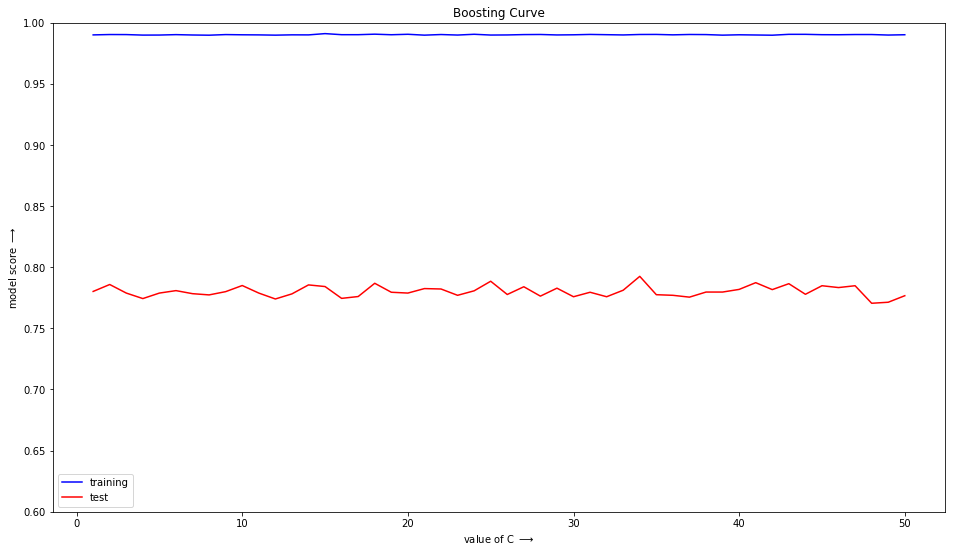

In [7]:




%matplotlib inline
plt.figure(figsize=(16,9))
train, = plt.plot(value_of_C,train_store,color='blue',label='training')
test, = plt.plot(value_of_C,test_store,color='red',label='test')

plt.legend(handles=[train, test] )

plt.xlabel(r'value of C $\longrightarrow$')
plt.ylabel(r'model score $\longrightarrow$')
plt.ylim(0.60,1)
plt.title("Boosting Curve", size=12)